# Problem Statement

An online retail store is trying to understand the various customer purchase patterns for their 
firm. Find useful insights about the customer purchasing history that can be an added advantage for the 
online retailer and segment the customers based on their purchasing behavior.

# Objective

* Reading and understanding the features.
* Feature engineering and feature extraction based on data.
* Data preprocessing and EDA using the data.
* Choosing an algorithm to perform clustering.
* Visualization of data after clustering

# Data Pre-Processing Steps

### Step 1 : Importing Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### Step 2 : Reading And Understanding data

In [3]:
retail=pd.read_csv(r'C:\Users\bindu\OneDrive\Desktop\DataScience Notes\OnlineRetail.csv',encoding = 'unicode_escape')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.shape

(541909, 8)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Step 3 : Data Cleansing

In [7]:
# Calculating the number of null values

retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Calculating the % of null values

df_null= round((retail.isnull().sum())/len(retail)*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [9]:
# Droping rows having missing values

retail = retail.dropna()
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [12]:
retail.loc[:,'CustomerID']=retail.loc[:,'CustomerID'].astype('str')

In [13]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [14]:
# Changing the datatype of Customer id as per bussiness understanding

# retail['CustomerID']=retail['CustomerID'].astype('str')

### Step 4 : Data Preperation

Analysing customers based on :

1) R(Recency) : Number of days since last purchase
    
2) F(Frequency) : Number of transactions
    
3) M(Monetary) : Total amount 

In [15]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [17]:
rfm_m=retail.groupby('CustomerID')['Amount'].sum()    # Helps to find total amount paid by a customer
rfm_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [18]:
rfm_m=pd.DataFrame(rfm_m)
rfm_m.reset_index(inplace=True) # Done to consider customerid as column name

In [19]:
rfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [20]:
rfm_m[rfm_m['CustomerID']=='17850.0']

,CustomerID,Amount
4048,17850.0,5288.63


In [21]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [22]:
# New Attribute : Frequency

rfm_f=retail.groupby('CustomerID')['InvoiceDate'].count()
rfm_f

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceDate, Length: 4372, dtype: int64

In [23]:
rfm_f=rfm_f.reset_index()
rfm_f.columns=['CustomerID','Frequency']
rfm_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [24]:
# Merging two dataframes

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [25]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

In [26]:
# New Attribute : Frequency

# Convert Invoice date from object type to datetime datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'] , format = '%m/%d/%Y %H:%M')

In [27]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [29]:
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [30]:
# Compute the difference between the max date and transaction date

retail['Difference'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [31]:
# Compute last transaction date to get the recency of customers

rfm_r=retail.groupby('CustomerID')['Difference'].min()
rfm_r=rfm_r.reset_index()
rfm_r.head()

,CustomerID,Difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [32]:
rfm_r.shape

(4372, 2)

In [33]:
# Extract only number of days

rfm_r['Difference']=rfm_r['Difference'].dt.days
rfm_r.head()

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [34]:
# Merge two dataframes to get final RFM df

rfm=pd.merge(rfm,rfm_r,on='CustomerID',how='inner')
rfm

,CustomerID,Amount,Frequency,Difference
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


In [35]:
rfm.columns=['CustomerID','Amount','Frequency','Recency']

In [36]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


### Step 5 : Outlier Analysis

In [37]:
col=['Amount','Frequency','Recency']
col

['Amount', 'Frequency', 'Recency']

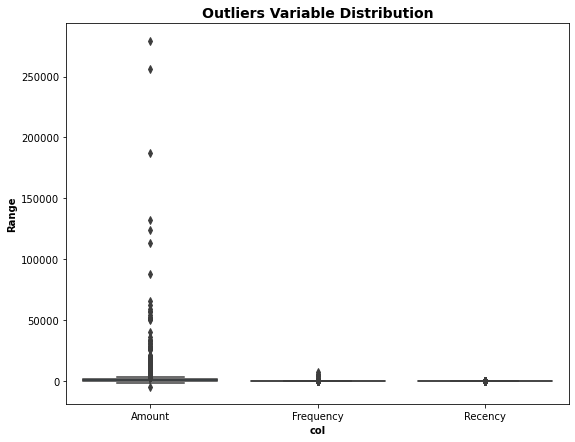

In [38]:
plt.figure(figsize=(9,7))
sns.boxplot(data=rfm[col])
plt.title('Outliers Variable Distribution',fontsize=14,fontweight='bold')
plt.ylabel('Range',fontweight='bold')
plt.xlabel('col',fontweight='bold');

In [39]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm =rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm =rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm =rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

In [40]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


### Step 6 : Rescaling the values in columns

In [41]:
rfm_df = rfm[['Amount','Frequency','Recency']]

# Instantiate
scaler = StandardScaler()

# Fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df) # mean = 0 & stddev = 1 
rfm_df_scaled                                # This is just normalization of data. Values are not changing.

array([[-1.04161396, -1.07094871,  2.13642223],
       [ 1.38529792, -0.3754979 , -0.28204953],
       [ 1.33170234,  0.63170672, -0.82162889],
       ...,
       [-0.93247827, -0.9510434 ,  0.73929711],
       [-0.80314128, -0.80715703, -0.92761769],
       [ 1.43936613,  0.55976353, -0.59038059]])

In [42]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount','Frequency','Recency']
rfm_df_scaled

,Amount,Frequency,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828
...,...,...,...
3692,-0.806787,-0.903081,-0.291685
3693,-0.797740,-0.879100,1.673926
3694,-0.932478,-0.951043,0.739297
3695,-0.803141,-0.807157,-0.927618


# Algorithm For The Model

I am choosing K Means Clustering method to perform this project. K Means clustering helps to 
partition n observations into k clusters in which each observation belongs to the cluster with 
the nearest mean. It guarantees convergence, can warm-start the positions of centroid and 
also easily adapts to new examples. It generalizes to cluster of different shapes and sizes. So, K 
Means Clustering is a perfect option for performing classification.

### Step 7 : Building the Model

### K-Means Clustering

In [43]:
# K-Means with some attribute k

kmeans=KMeans(n_clusters=4) # Here we are randomly selecting number of cluster.
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [44]:
kmeans.labels_

array([0, 3, 3, ..., 0, 2, 3])

### Finding the Optimal Number Of Clusters

### Elbow Curve to get the right number of clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be
clustured. The Elbow method is one of the most popular methods to determine the optimal value of k.

In [45]:
# for the 1st loop num_cluster=2
# it will create a kmeans model for 2 num of clusters
# feeding the scaled data in 2 clusters k means model

In [46]:
# Elbow-Curve/SSD
# inertia
# Sum of squared distances of samples to their closest cluster center

ssd=[]
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)  # inertia : sum of the square distances
ssd

[6206.330006580115,
 3757.965155399352,
 2952.9218593152464,
 2516.6441690251822,
 2200.6642248701187,
 1952.5428844173337,
 1772.5078465615074]

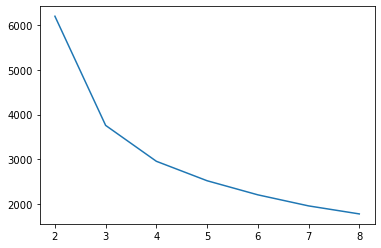

In [47]:
# plot the SSDs for each n_clusters

x=[2,3,4,5,6,7,8]  # Always we will be getting an elbow shaped graph . Thats why this method is known as Elbow Curve
y=ssd              # Always check the end point of elbow(point where change in pattern is coming)
plt.plot(x,y);

We can see that the curve is coming at the point 5 in the graph. So, the optimal number of 
clusters = 5.


In [54]:
# Final model with k =5

kmeans=KMeans(n_clusters=5)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=5)

In [55]:
kmeans.labels_

array([1, 4, 4, ..., 1, 2, 4])

In [56]:
rfm_df_scaled

,Amount,Frequency,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828
...,...,...,...
3692,-0.806787,-0.903081,-0.291685
3693,-0.797740,-0.879100,1.673926
3694,-0.932478,-0.951043,0.739297
3695,-0.803141,-0.807157,-0.927618


In [58]:
# Assigning labels

rfm['Cluster_id'] = kmeans.labels_
rfm

,CustomerID,Amount,Frequency,Recency,Cluster_id
0,12346.0,0.00,2,325,1
2,12348.0,1797.24,31,74,4
3,12349.0,1757.55,73,18,4
4,12350.0,334.40,17,309,1
5,12352.0,1545.41,95,35,0
...,...,...,...,...,...
4366,18278.0,173.90,9,73,2
4367,18280.0,180.60,10,277,1
4368,18281.0,80.82,7,180,1
4369,18282.0,176.60,13,7,2


### Step 8 : Data Visualization

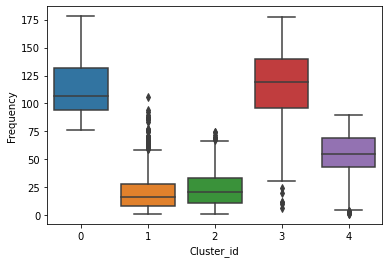

In [60]:
# Box plot to visualize Frequency vs Cluster_id

sns.boxplot(x='Cluster_id',y='Frequency',data=rfm);

 Here we can see that cluster_id 0 and 3 is having almost same end point. But the starting point is maximum for cluster_id 0.
So, if we are considering frequency, we have to focus more on customer with cluster_id 0

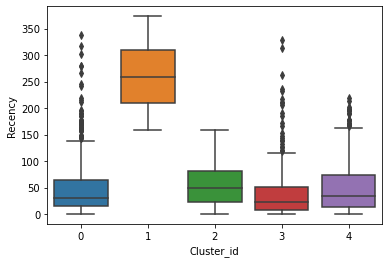

In [61]:
# Box plot to visualize Recency vs Cluster_id

sns.boxplot(x='Cluster_id',y='Recency',data=rfm);

 We know that if recency is high , then there last purchase is long ago. So we have to focus on those with low recency 
value. So here we have to consider customers with cluster_id 3

In [62]:
# Data of customer with high monetary and low recency

rfm[rfm['Cluster_id']==3]

,CustomerID,Amount,Frequency,Recency,Cluster_id
9,12356.0,2811.43,59,22,3
13,12360.0,2662.06,129,51,3
20,12370.0,3545.69,167,50,3
29,12380.0,2720.56,105,21,3
30,12381.0,1803.96,91,4,3
...,...,...,...,...,...
4341,18242.0,2232.49,78,71,3
4342,18245.0,2507.56,177,6,3
4351,18257.0,2265.38,123,38,3
4353,18260.0,2595.00,140,172,3


In [63]:
# Data of customer with high recency

rfm[rfm['Cluster_id']==0]

,CustomerID,Amount,Frequency,Recency,Cluster_id
5,12352.0,1545.41,95,35,0
36,12391.0,460.89,100,21,0
96,12463.0,1303.63,88,45,0
168,12556.0,603.71,121,49,0
184,12576.0,1306.98,89,35,0
...,...,...,...,...,...
4273,18156.0,734.94,140,12,0
4281,18168.0,1133.64,140,175,0
4290,18178.0,1573.41,99,113,0
4304,18196.0,689.13,141,94,0


# Inference

i) Customers with cluster_id 3 are the customers with high amount of transactions and also recent customers compared to others.

ii) Customers with cluster_id 0 are frequent buyers.